# Q1 Agenda & Executive Summary of the data -> Contents of the ppt -> Problem statement -> About Data (Info, Shape, Summary Stats, your assumptions about data)

In [12]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Get the Data

from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Data/Sales_Data.xlsx"
df=pd.read_excel(path, sheet_name="Sheet1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


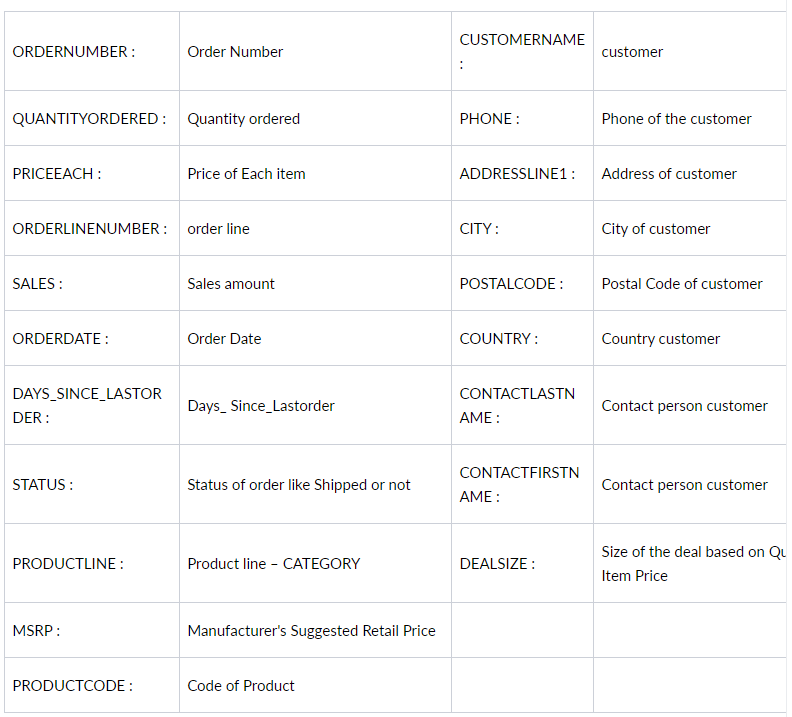

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.shape

(2747, 20)

In [5]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
#Find data type of each column
df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

In [8]:
# Find if duplicate values is there
df.duplicated().sum()

0

In [9]:
#Find null values in the dataset
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [10]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.76,91.88,10100.00,10181.00,10264.00,10334.50,10425.00
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.09,819.28,42.00,1077.00,1761.00,2436.50,3562.00
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00


In [11]:
#Obtain the number of unique values in each column
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1984
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

# Q2 Exploratory Analysis and Inferences -> Univariate, Bivariate, and multivariate analysis using data visualization (Weekly, Monthly, Quarterly, Yearly Trends in Sales and Sales Across different Categories of different features in the given data) -> Summarise the inferences

### Univariate Analysis




In [ ]:
#To find the skeweness of every column
skewness = pd.DataFrame(df.skew().round(4).sort_values()).reset_index()
skewness = skewness.rename(columns = {'index':'Attributes',0:'skewness'})
skewness

,Attributes,skewness
0,ORDERNUMBER,-0.0070
1,DAYS_SINCE_LASTORDER,-0.0030
2,QUANTITYORDERED,0.3693
3,ORDERLINENUMBER,0.5753
4,MSRP,0.5756
5,PRICEEACH,0.6972
6,SALES,1.1559


In [ ]:
# Find kurtosis of all column
pd.DataFrame(df.kurtosis(),columns=['kurtosis']).round(4).rename_axis(index='Feature')

,kurtosis
Feature,
ORDERNUMBER,-1.1544
QUANTITYORDERED,0.4429
PRICEEACH,0.2285
ORDERLINENUMBER,-0.5910
SALES,1.7731
DAYS_SINCE_LASTORDER,-1.0245
MSRP,-0.1395


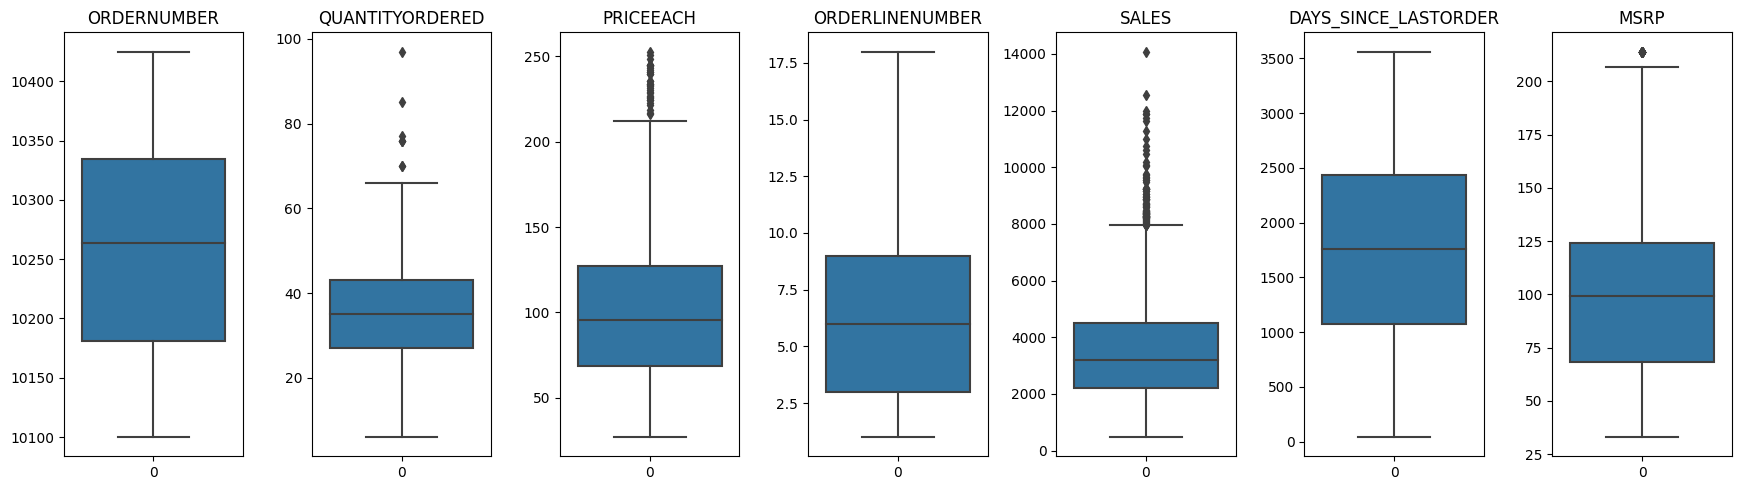

In [ ]:
#Boxplot Representation
df_num= df.select_dtypes(include=['float64','int64'])
data_plot=df_num
fig=plt.figure(figsize=(20,5))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(1,8,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i])
plt.tight_layout()

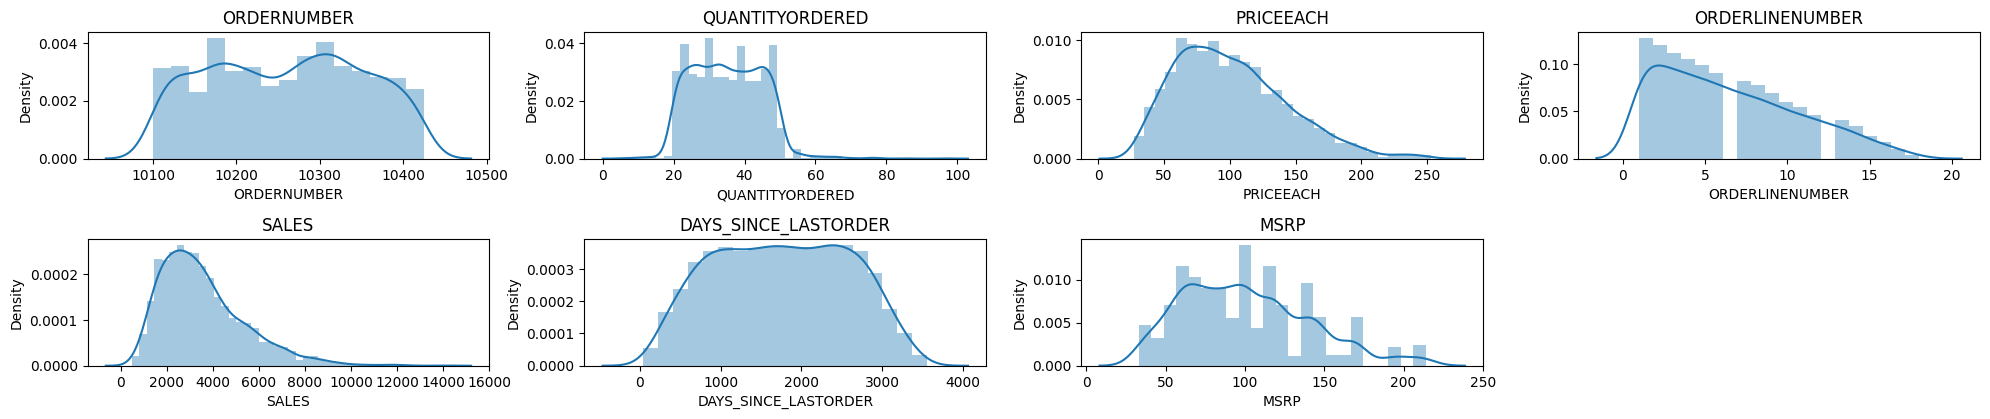

In [ ]:
#Distplot Representation
df_num= df.select_dtypes(include=['float64','int64'])
data_plot=df_num
fig=plt.figure(figsize=(20,8))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i])
plt.tight_layout()

### Bivariate Analysis

In [ ]:
#Find sales - Status wise
(df.groupby('STATUS').sum()['SALES']).sort_values()

STATUS
Disputed        72212.86
In Process     144729.96
Resolved       150718.28
On Hold        178979.19
Cancelled      194487.48
Shipped       9019093.94
Name: SALES, dtype: float64

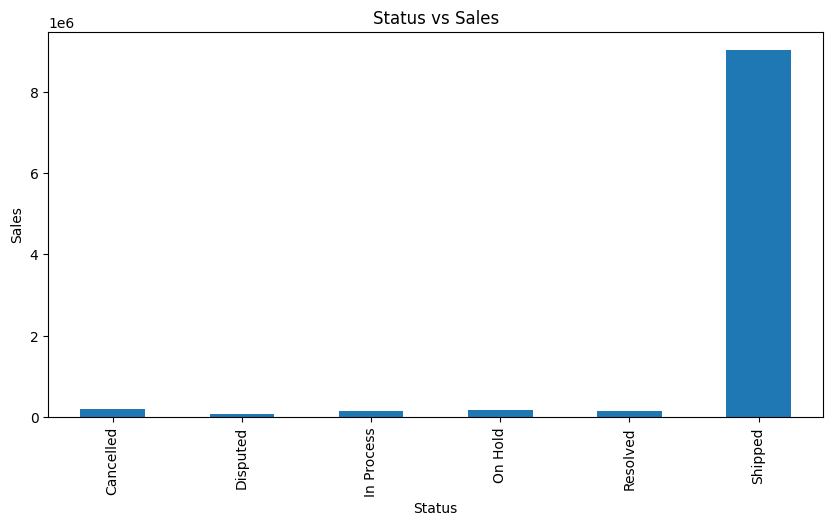

In [ ]:
#Find sales Status wise
(df.groupby('STATUS').sum()['SALES']).plot(kind='bar',figsize=(10,5))
plt.title('Status vs Sales')
plt.xlabel('Status')
plt.ylabel('Sales')
plt.show();

In [ ]:
#Find sales Product line wise
(df.groupby('PRODUCTLINE').sum()['SALES']).sort_values()

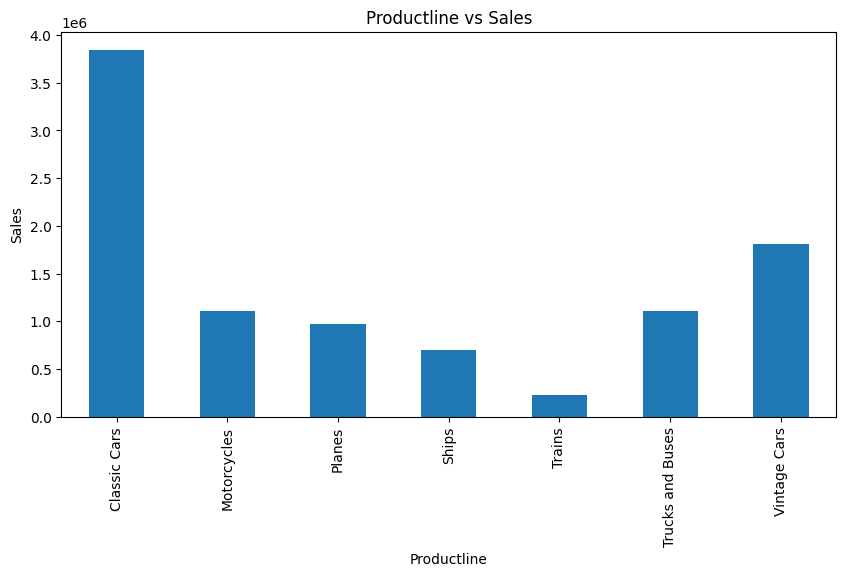

In [ ]:
#Find sales Product line wise
(df.groupby('PRODUCTLINE').sum()['SALES']).plot(kind='bar',figsize=(10,5))
plt.title('Productline vs Sales')
plt.xlabel('Productline')
plt.ylabel('Sales')
plt.show();

In [ ]:
#Find sales dealsize wise
(df.groupby('DEALSIZE').sum()['SALES']).sort_values()

DEALSIZE
Large     1258956.40
Small     2570033.84
Medium    5931231.47
Name: SALES, dtype: float64

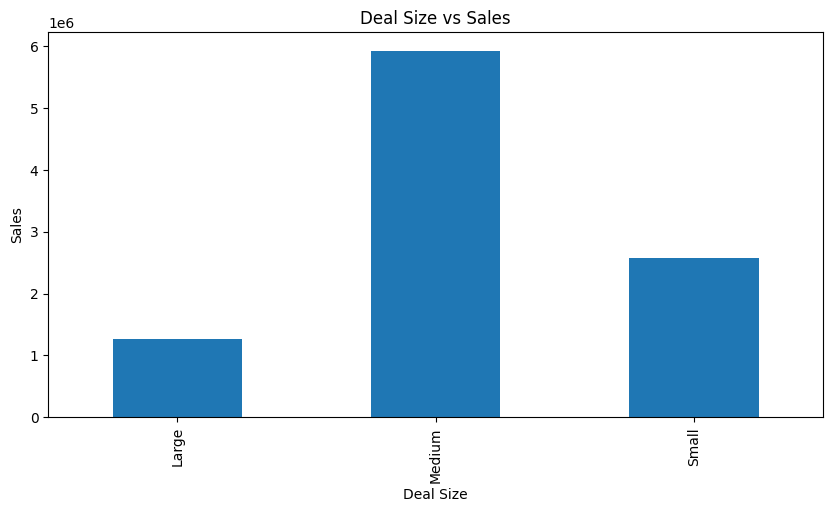

In [ ]:
#Find sales DEALSIZE wise
(df.groupby('DEALSIZE').sum()['SALES']).plot(kind='bar',figsize=(10,5))
plt.title('Deal Size vs Sales')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.show();


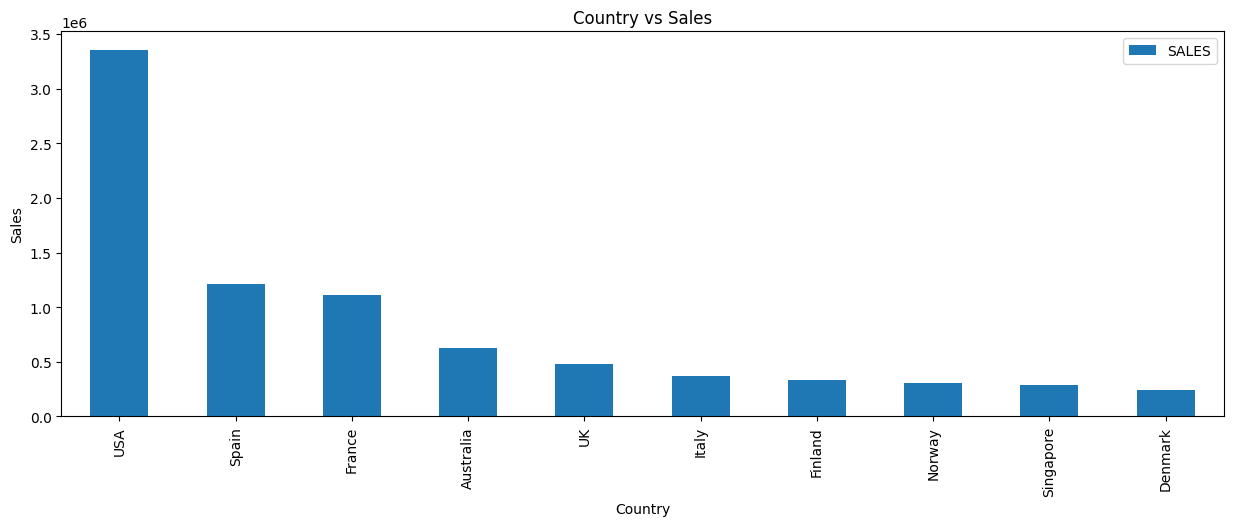

In [ ]:
df.groupby(by=['COUNTRY'])['SALES'].sum().reset_index().sort_values(['SALES'],
                    ascending=False).head(10).plot(x='COUNTRY',y='SALES',kind='bar', figsize=(15,5))
plt.title('Country vs Sales')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show();

In [ ]:
df1 =df.copy()
cols = ['CONTACTFIRSTNAME', 'CONTACTLASTNAME']
df1['Full name'] = df1[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

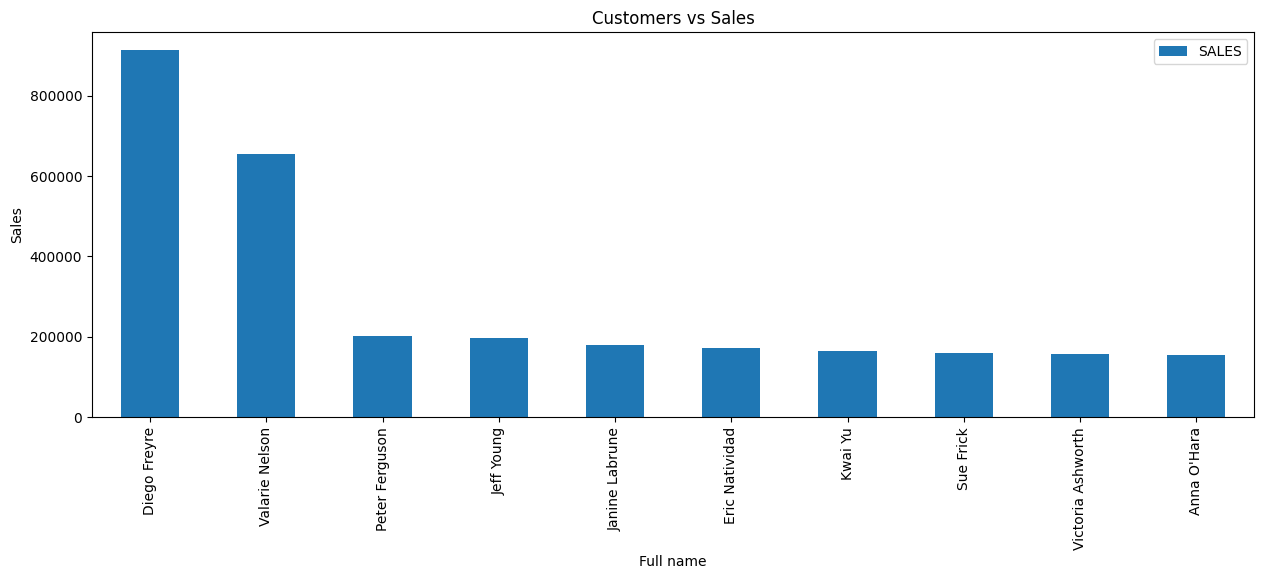

In [ ]:
df1.groupby(by=['Full name'])['SALES'].sum().reset_index().sort_values(['SALES'],
                    ascending=False).head(10).plot(x='Full name',y='SALES',kind='bar',figsize=(15,5))
plt.title('Customers vs Sales')
plt.xlabel('Full name')
plt.ylabel('Sales')
plt.show()

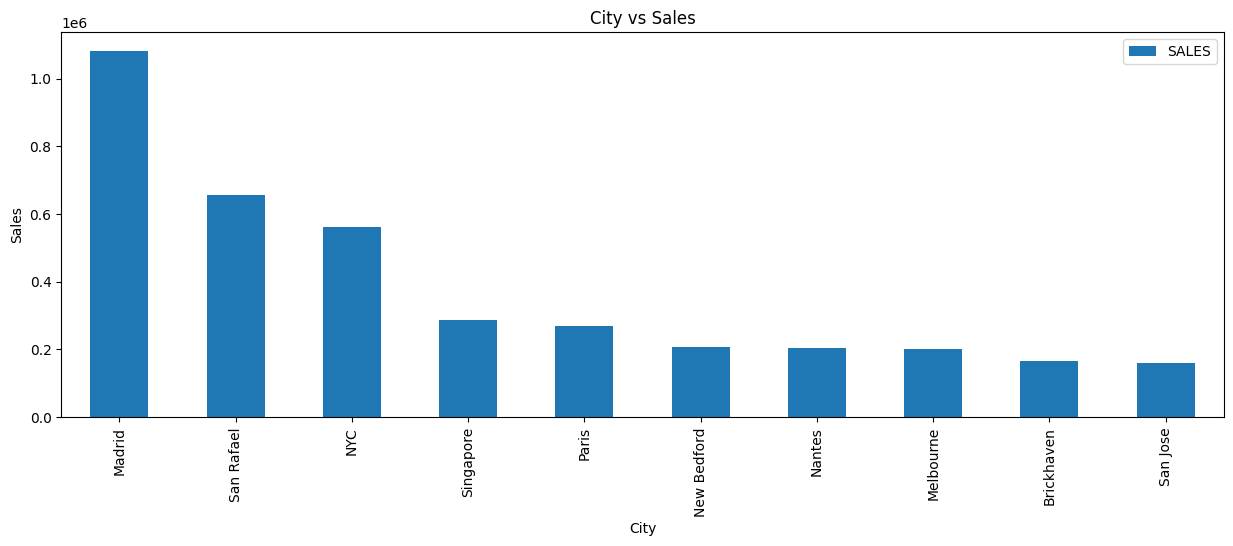

In [ ]:
df.groupby(by=['CITY'])['SALES'].sum().reset_index().sort_values(['SALES'],
                    ascending=False).head(10).plot(x='CITY',y='SALES',kind='bar', figsize=(15,5))
plt.title('City vs Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show();

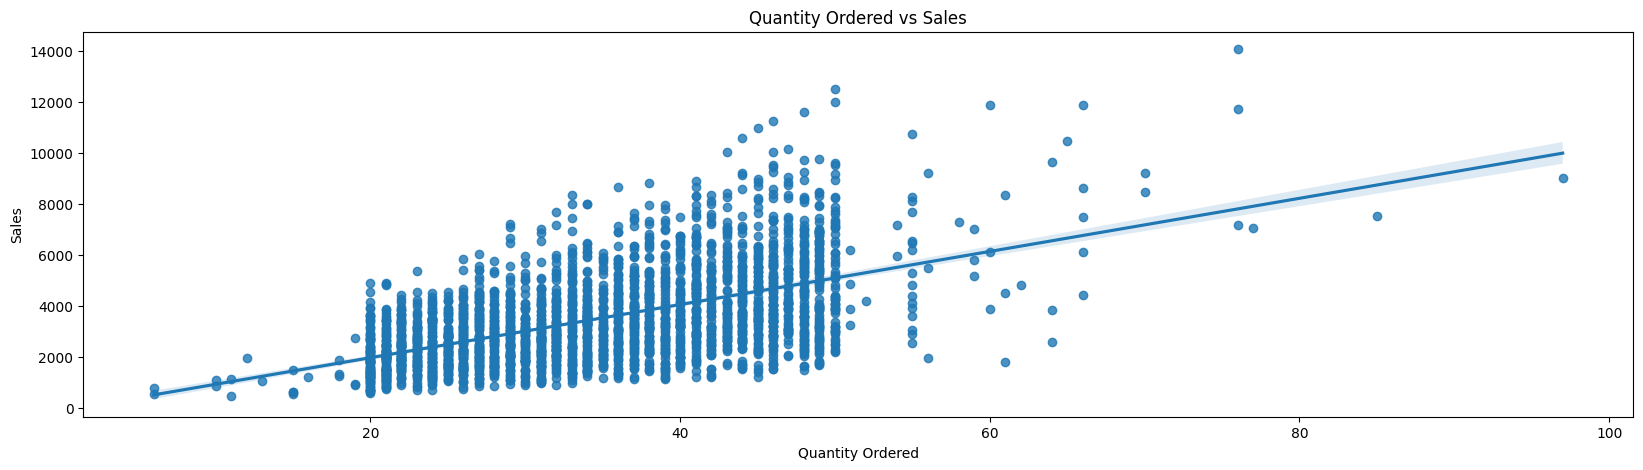

In [ ]:
figure = plt.figure(figsize=(20,5))
sns.regplot(data=df, y='SALES', x='QUANTITYORDERED')
plt.title('Quantity Ordered vs Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show();

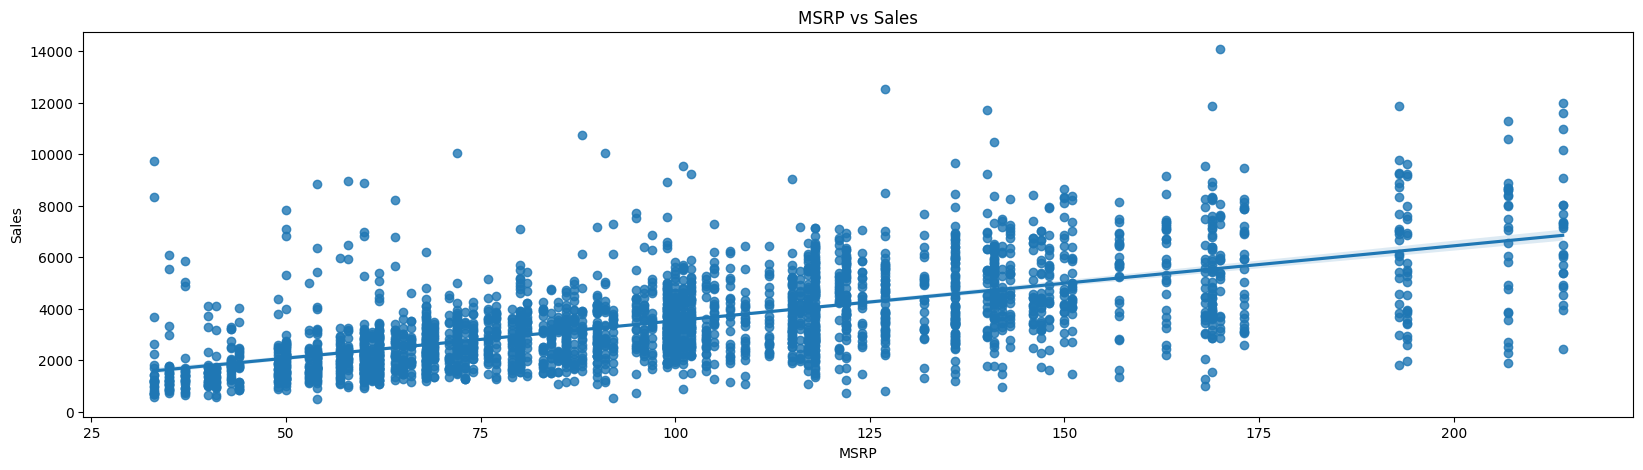

In [ ]:
figure = plt.figure(figsize=(20,5))
sns.regplot(data=df, y='SALES', x='MSRP')
plt.title('MSRP vs Sales')
plt.xlabel('MSRP')
plt.ylabel('Sales')
plt.show();

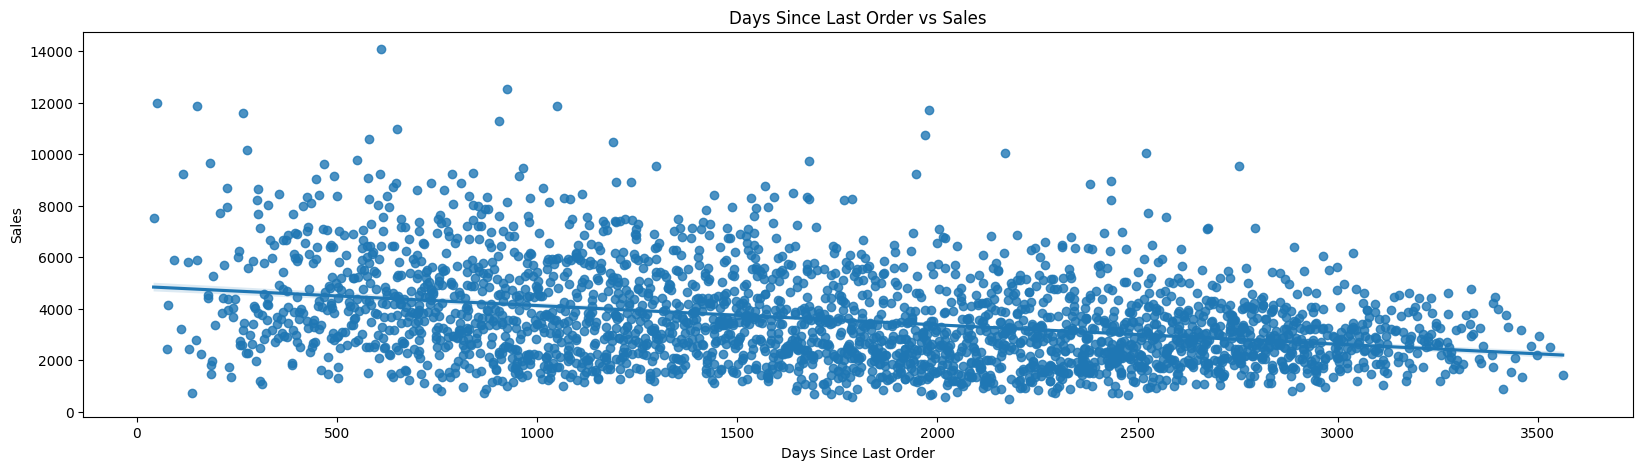

In [ ]:
figure = plt.figure(figsize=(20,5))
sns.regplot(data=df, y='SALES', x='DAYS_SINCE_LASTORDER')
plt.title('Days Since Last Order vs Sales')
plt.xlabel('Days Since Last Order')
plt.ylabel('Sales')
plt.show();

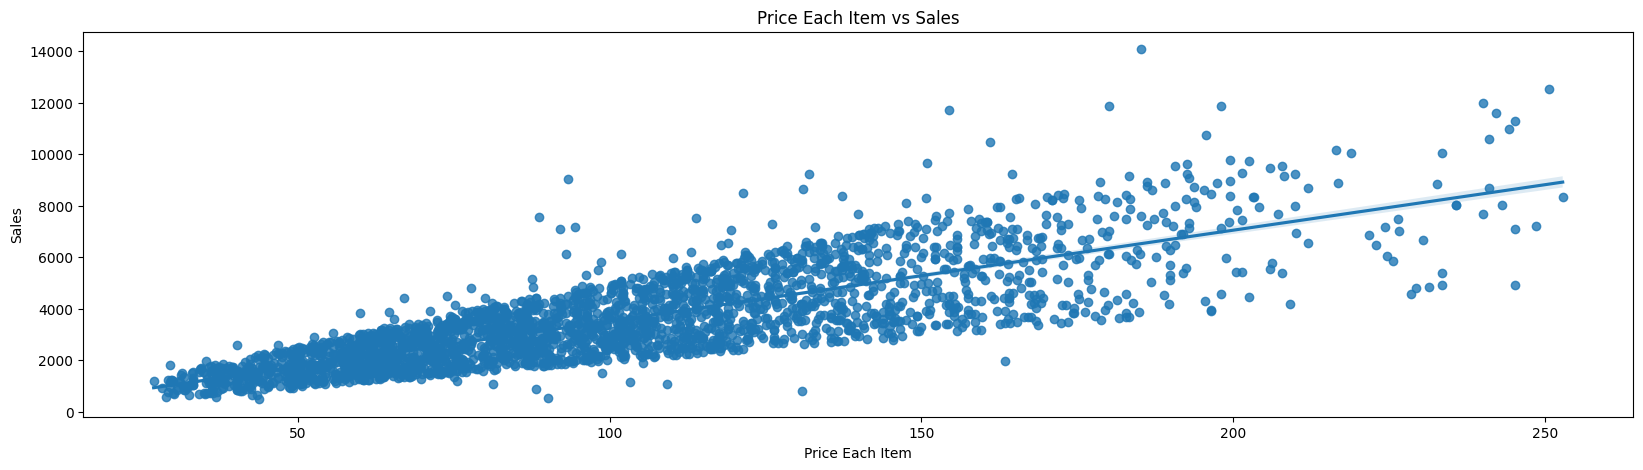

In [ ]:
figure = plt.figure(figsize=(20,5))
sns.regplot(data=df, y='SALES', x='PRICEEACH')
plt.title('Price Each Item vs Sales')
plt.xlabel('Price Each Item')
plt.ylabel('Sales')
plt.show();

### Multivariate Analysis

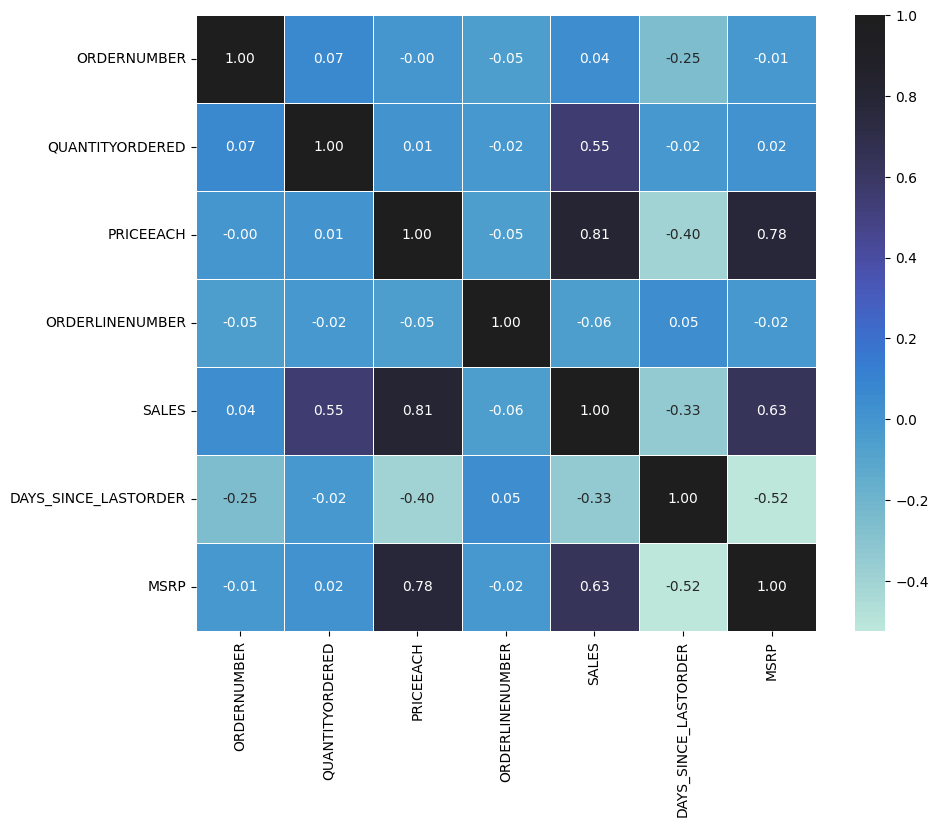

In [ ]:
# Heatmap of correlation
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, linewidths=.5, fmt= '.2f', center = 1 ) 
plt.show()

In [ ]:
df.corr().round(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.00,0.07,-0.00,-0.05,0.04,-0.25,-0.01
QUANTITYORDERED,0.07,1.00,0.01,-0.02,0.55,-0.02,0.02
PRICEEACH,-0.00,0.01,1.00,-0.05,0.81,-0.40,0.78
ORDERLINENUMBER,-0.05,-0.02,-0.05,1.00,-0.06,0.05,-0.02
SALES,0.04,0.55,0.81,-0.06,1.00,-0.33,0.63
DAYS_SINCE_LASTORDER,-0.25,-0.02,-0.40,0.05,-0.33,1.00,-0.52
MSRP,-0.01,0.02,0.78,-0.02,0.63,-0.52,1.00


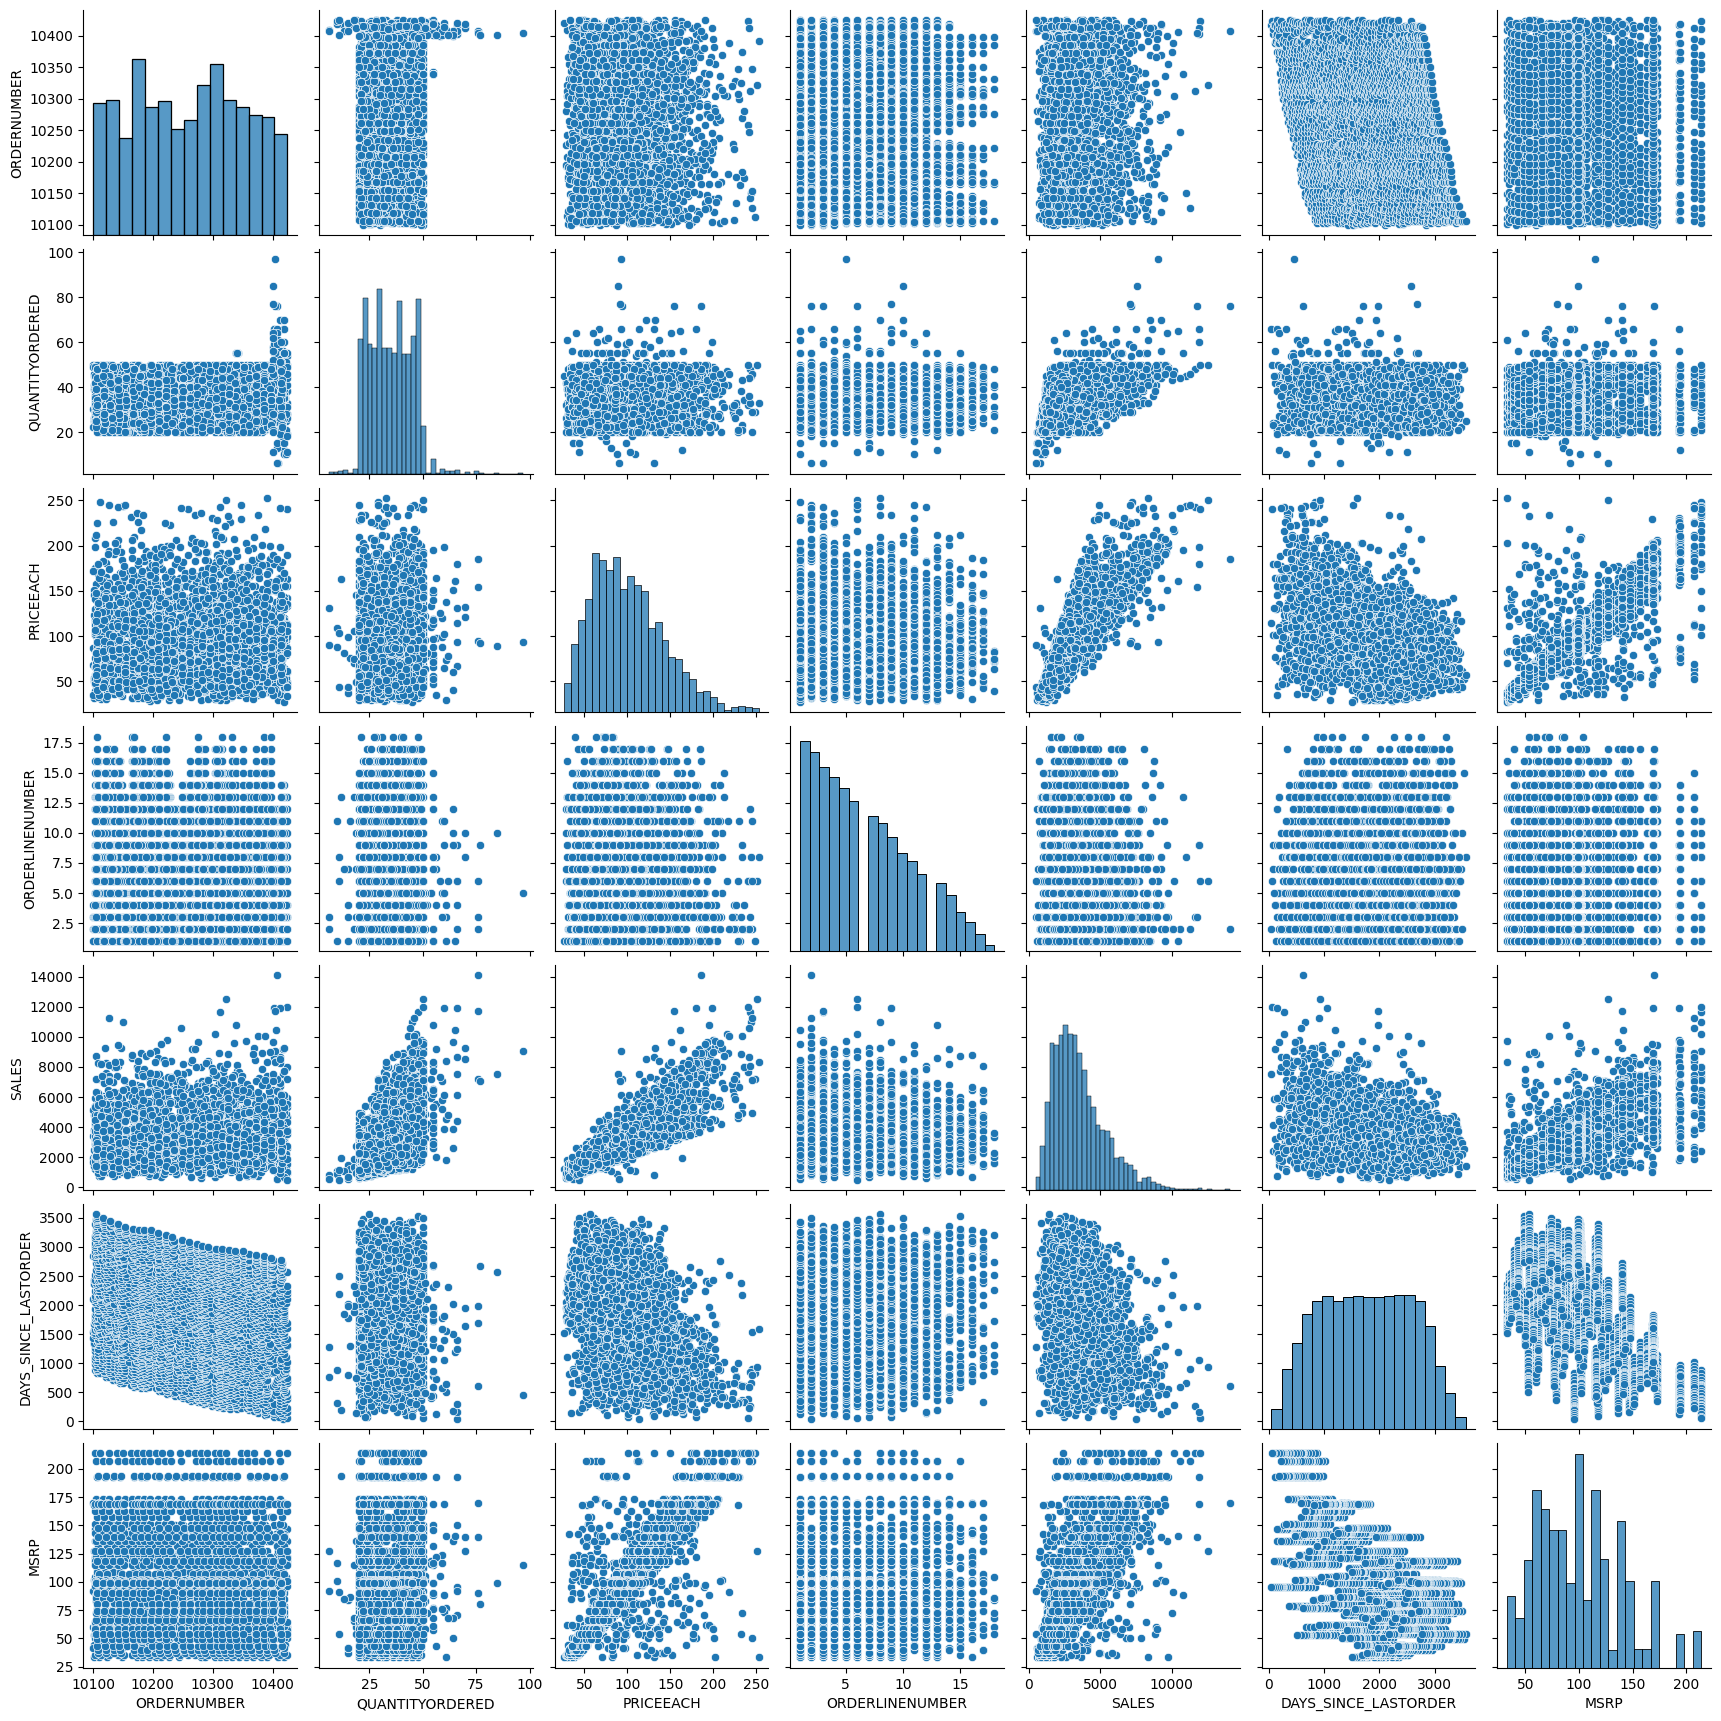

In [ ]:
# Pairplot
sns.pairplot(df)

### Weekly, Monthly, Quarterly, Yearly Trends in Sales

In [15]:
time_df = df[['ORDERDATE','SALES']].copy()
time_df.head()

,ORDERDATE,SALES
0,2018-02-24,2871.00
1,2018-05-07,2765.90
2,2018-07-01,3884.34
3,2018-08-25,3746.70
4,2018-10-28,3479.76


In [16]:
time_df = time_df.set_index('ORDERDATE')
time_df.head()

,SALES
ORDERDATE,
2018-02-24,2871.00
2018-05-07,2765.90
2018-07-01,3884.34
2018-08-25,3746.70
2018-10-28,3479.76


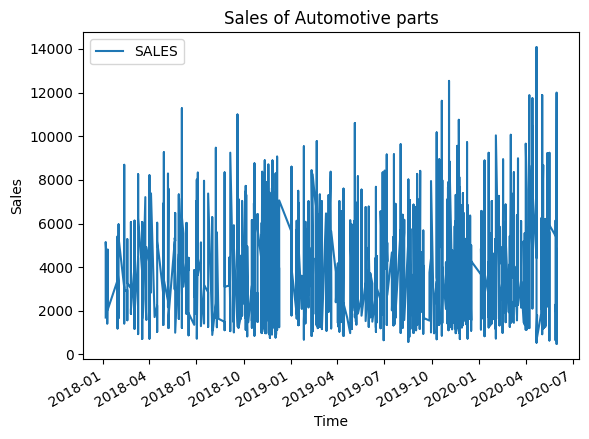

In [ ]:
#Plot the Time Series
time_df.plot()
plt.title('Sales of Automotive parts', fontsize=12)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [ ]:
Weekly, Monthly, Quarterly, Yearly Trends in Sales

**Yearly**

In [ ]:
#Yearly Representation of sum of Sales

time_df_year_sum = time_df.resample('A').sum()
time_df_year_sum.head()

,SALES
ORDERDATE,
2018-12-31,3353014.06
2019-12-31,4669924.56
2020-12-31,1737283.09


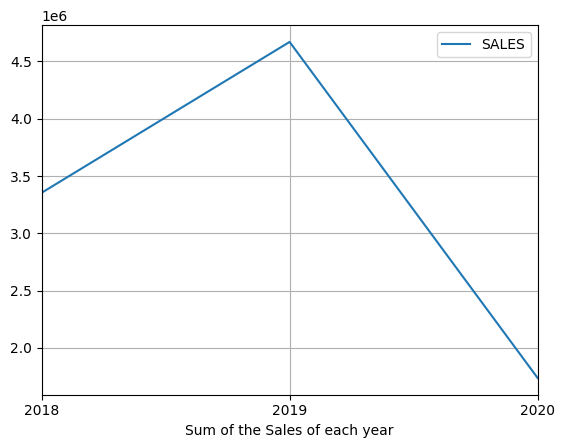

In [ ]:
time_df_year_sum.head().plot();
plt.grid()
plt.xlabel('Sum of the Sales of each year');

In [ ]:
#Yearly Representation of mean of Sales
df_yearly_mean = time_df.resample('Y').mean()
df_yearly_mean.head()

,SALES
ORDERDATE,
2018-12-31,3518.377817
2019-12-31,3513.863476
2020-12-31,3736.092667


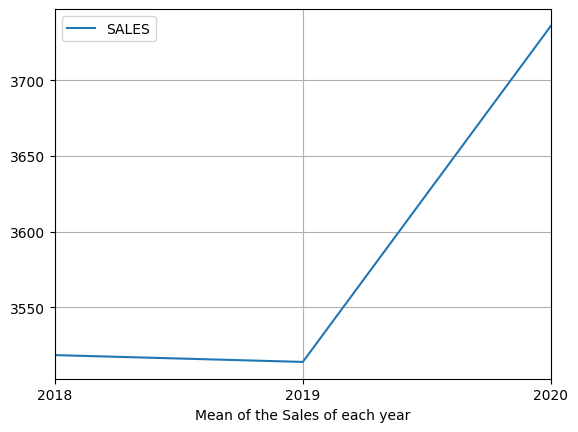

In [ ]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Sales of each year');

**Quarterly**

In [17]:
df_quarterly_sum = time_df.resample('Q').sum()
df_quarterly_sum.head()

,SALES
ORDERDATE,
2018-03-31,426399.11
2018-06-30,562365.22
2018-09-30,649514.54
2018-12-31,1714735.19
2019-03-31,809841.36


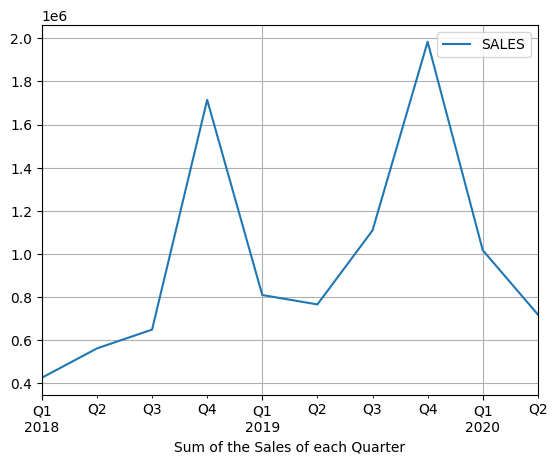

In [18]:
df_quarterly_sum.plot();
plt.xlabel('Sum of the Sales of each Quarter');
plt.grid()

In [19]:
df_quarterly_mean = time_df.resample('Q').mean()
df_quarterly_mean.head()

,SALES
ORDERDATE,
2018-03-31,3438.702500
2018-06-30,3471.390247
2018-09-30,3529.970326
2018-12-31,3550.176377
2019-03-31,3599.294933


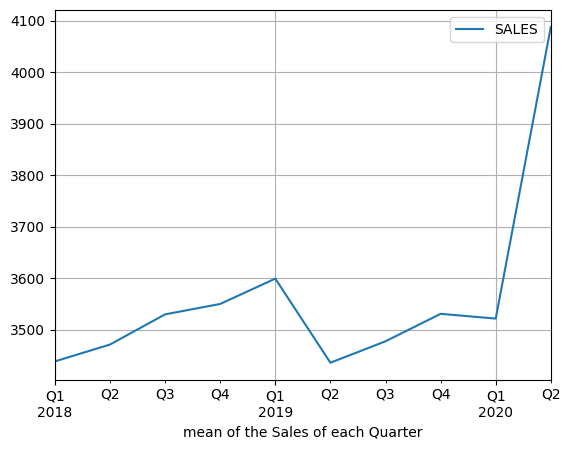

In [21]:
df_quarterly_mean.plot();
plt.xlabel('mean of the Sales of each Quarter');
plt.grid()

**Monthly**

In [22]:
df_month_sum = time_df.resample('M').sum()
df_month_sum.head()

,SALES
ORDERDATE,
2018-01-31,129753.60
2018-02-28,140836.19
2018-03-31,155809.32
2018-04-30,201609.55
2018-05-31,192673.11


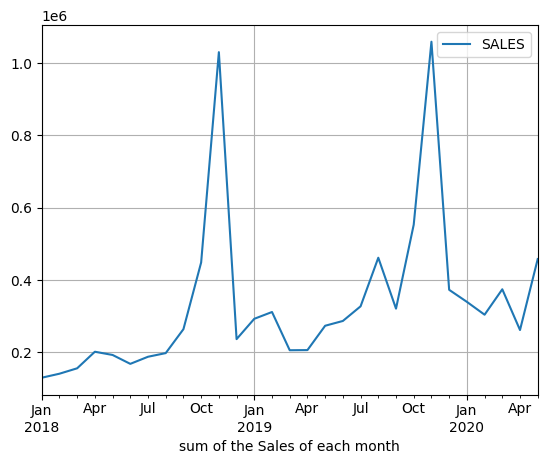

In [23]:
df_month_sum.plot();
plt.xlabel('sum of the Sales of each month');
plt.grid()

In [24]:
df_month_mean = time_df.resample('M').mean()
df_month_mean.head()

,SALES
ORDERDATE,
2018-01-31,3327.015385
2018-02-28,3435.029024
2018-03-31,3541.120909
2018-04-30,3476.026724
2018-05-31,3321.950172


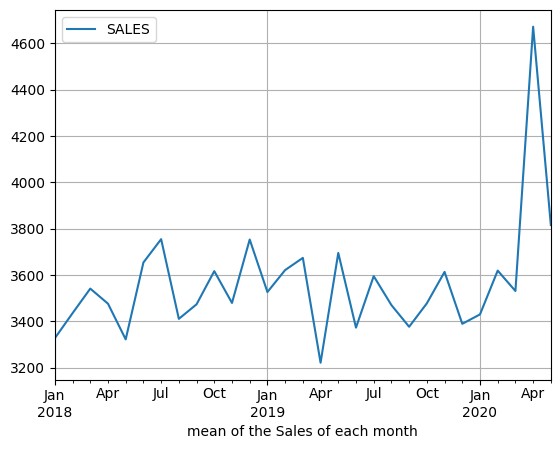

In [25]:
df_month_mean.plot();
plt.xlabel('mean of the Sales of each month');
plt.grid()

In [26]:
df_month_mean.head()

,SALES
ORDERDATE,
2018-01-31,3327.015385
2018-02-28,3435.029024
2018-03-31,3541.120909
2018-04-30,3476.026724
2018-05-31,3321.950172


**Weekly**

In [28]:
df_week_sum = time_df.resample('W').sum()
df_week_sum.head()

,SALES
ORDERDATE,
2018-01-07,12133.25
2018-01-14,18296.39
2018-01-21,0.00
2018-01-28,0.00
2018-02-04,99323.96


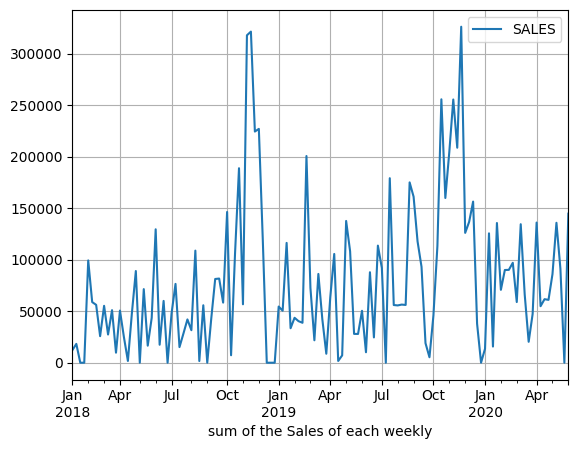

In [29]:
df_week_sum.plot();
plt.xlabel('sum of the Sales of each weekly');
plt.grid()

In [31]:
df_week_mean = time_df.resample('W').mean()
df_week_mean.head()

,SALES
ORDERDATE,
2018-01-07,3033.312500
2018-01-14,3049.398333
2018-01-21,NaN
2018-01-28,NaN
2018-02-04,3424.964138


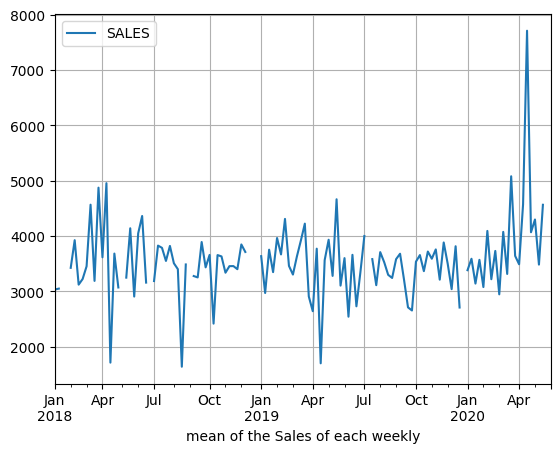

In [32]:
df_week_mean.plot();
plt.xlabel('mean of the Sales of each weekly');
plt.grid()